In [204]:
import pandas as pd
import numpy as np
import multiprocess as mp
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Model

$$p=\frac{1}{1+e^{-\sum_i c_i x^i}}$$

In [322]:
def model(X):
    n=X.shape[1]
    err=np.random.normal(0,0.1,X.shape[0])
    c1=np.random.normal(0,10,5)
    c2=np.random.normal(0,0.01,n-5)
    C=np.concatenate([c1,c2])
    np.random.shuffle(C)
    w=np.dot(X,C)
    p=1/(1+np.exp(-w+err))

    return (p>0.5).astype('int')

In [429]:
N=1000

In [428]:
def scores(t):
    ml,d=t
    X=np.random.rand(N,d)*2-1
    Y=model(X)
    xtrain,xtest,ytrain, ytest=train_test_split(X,Y,test_size=0.2)
    ml.fit(xtrain,ytrain)
    acc_train=ml.score(xtrain,ytrain)
    acc_test=ml.score(xtest,ytest)
    
    return acc_train, acc_test

In [422]:
dims=[8,10,15,20,25,50,100,200,300,400,500,600,700,800,1000]

In [423]:
lst=[(DecisionTreeClassifier(max_depth=5,max_features=8),d) for d in dims]

In [331]:
lst=[(LogisticRegression(),d) for d in dims]

In [426]:
lst=[(GradientBoostingClassifier(n_estimators=10),d) for d in dims]

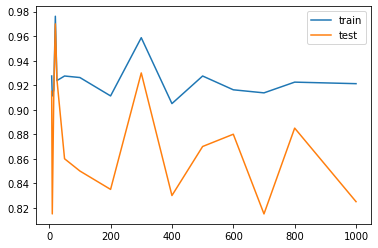

In [430]:
with mp.Pool(mp.cpu_count()) as pool:
    result=pool.map(scores,lst)
    
x=[a for a,_ in result]
y=[b for _,b in result]
plt.plot(dims,x)
plt.plot(dims,y)
plt.legend(['train','test'])

In [435]:
df=pd.DataFrame(X)

In [439]:
df=df[df>0.1]

In [444]:
dt=DecisionTreeClassifier(max_depth=5)

# Logistic Regression

In [22]:
lgr=LogisticRegression()

In [51]:
mls,a,b=scores(lgr,N=1000)
a,b

([0.9925, 0.9925, 0.99375, 0.995, 0.99125, 1.0, 1.0],
 [1.0, 0.97, 0.975, 0.96, 0.95, 0.835, 0.81])

In [56]:
mls[2]

array([[ 7.99104630e-03,  4.23148377e-02,  2.49483120e-01,
         2.34309683e-02, -3.16772733e+00,  5.75391779e+00,
        -4.41840461e-03, -5.67056148e-03,  3.47984477e+00,
        -9.92118271e-03, -1.73132374e-02, -9.21099915e-02,
        -3.76580335e-01, -3.82408095e-02,  4.01982143e-02,
         2.30760634e+00,  4.32259500e-02,  1.52864512e-01,
        -6.76229746e-02, -4.41156259e-02]])

# Gradboosting

In [26]:
gb=GradientBoostingClassifier(n_estimators=5)

In [72]:
_,a,b=scores(gb,N=10000)
a,b

([0.86475, 0.817125, 0.869, 0.839625, 0.90725, 0.901125, 0.894125],
 [0.8515, 0.8145, 0.8775, 0.83, 0.9, 0.88, 0.886])

# Decision Tree

In [62]:
dt=DecisionTreeClassifier(max_depth=5)

In [68]:
_,a,b=scores(dt,N=100)
a,b

([0.975, 1.0, 0.9875, 0.9875, 1.0, 1.0, 1.0],
 [0.75, 0.7, 0.7, 0.55, 0.8, 0.9, 0.85])